<a href="https://colab.research.google.com/github/StoryWeaversGuild/Heart_Disease_Predictor/blob/main/Heart_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DAY 1-DATA PREPROCESSING**

In [90]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"storyweaversguild","key":"324b4d747ec23452394dfb3bf5dfda2f"}'}

In [91]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [92]:
!pip install kaggle

In [93]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 38.4MB/s]


In [94]:
import pandas as pd
df = pd.read_csv('/content/heart-disease/heart_disease_uci.csv')

In [95]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [96]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [97]:
df.isnull().sum()


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [98]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

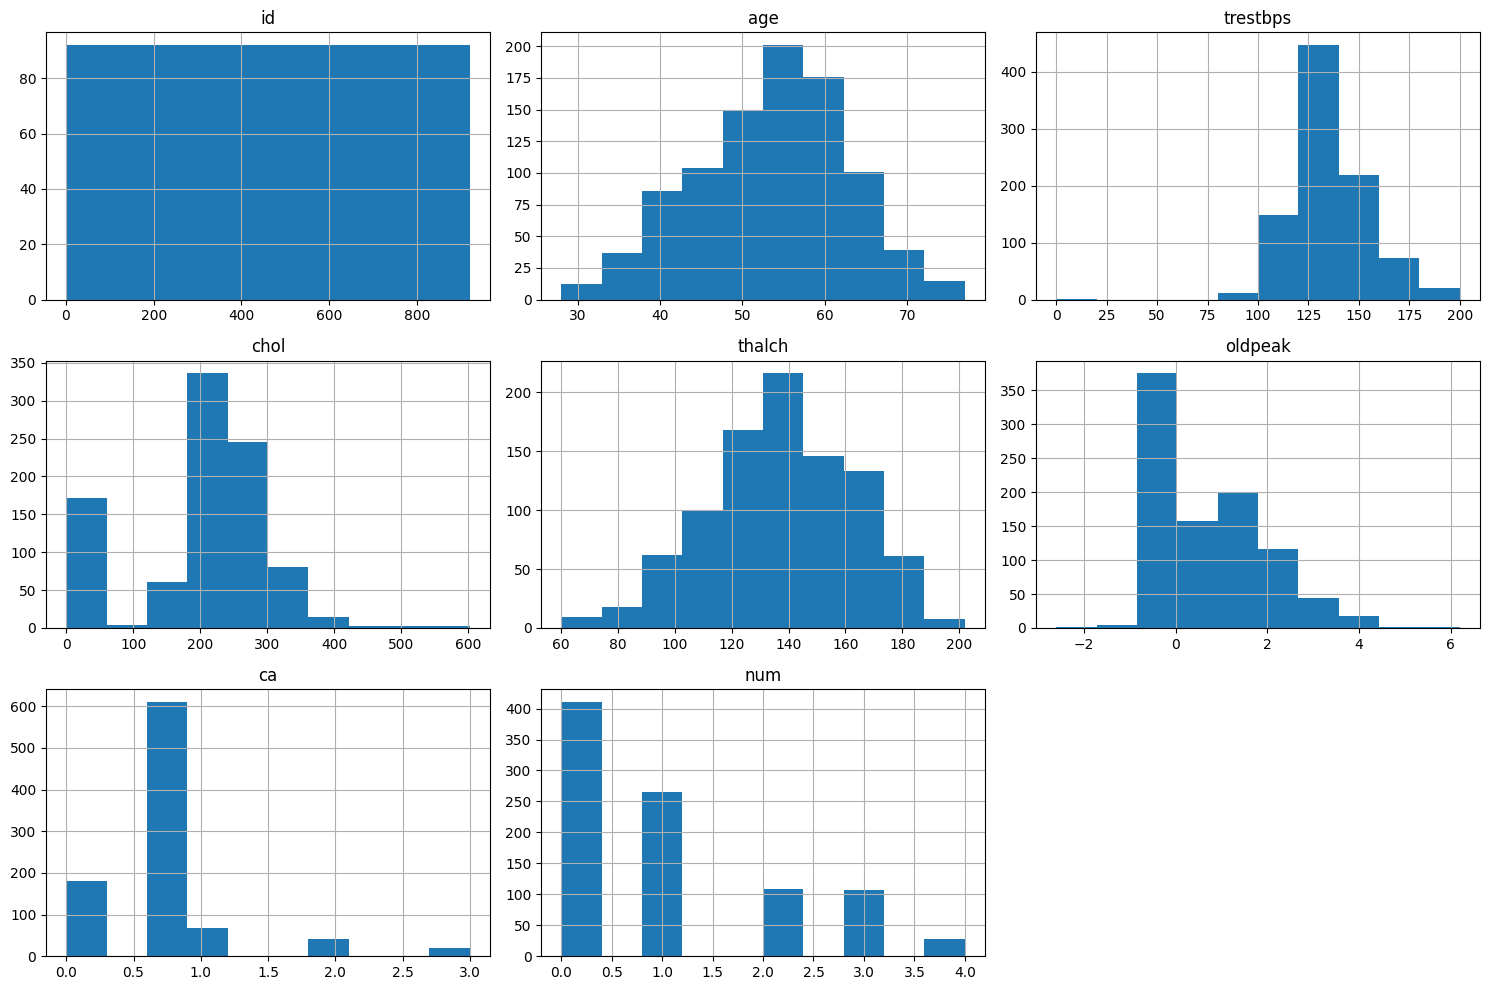

In [100]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

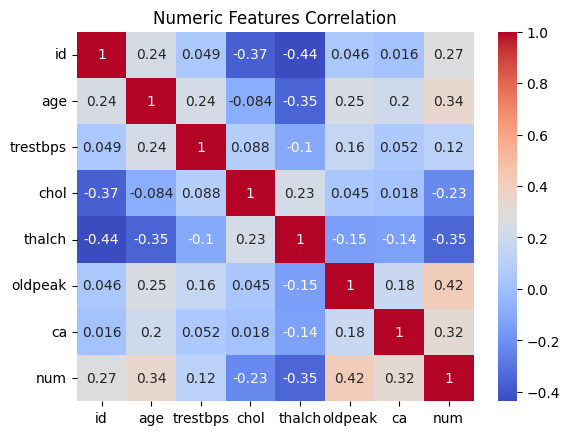

In [101]:
sns.heatmap(df[numeric_cols].corr(),annot = True,cmap='coolwarm')
plt.title('Numeric Features Correlation')
plt.show()

# **Day 2 - Feature Engineering**

In [102]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('num')

In [103]:
X = df.drop('num',axis=1)
y = (df['num']>0).astype(int)

In [104]:
X = pd.get_dummies(X, columns=cat_cols)
print("Final feature columns:",X.columns)

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


# **DAY 3 - Train/Test/Split,Normalization,Modeling and Evaluation**

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [106]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [108]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
X_tr_scaled = scaler.fit_transform(X_tr)
X_val_scaled = scaler.transform(X_val)

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [112]:
from sklearn.metrics import accuracy_score,classification_report

In [113]:
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.842391304347826
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



# **Support Vector Machine**

In [114]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [115]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [116]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [117]:
print("## Support Vector Machine Results ##")
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

## Support Vector Machine Results ##

SVM Accuracy: 0.8641304347826086

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        75
           1       0.90      0.87      0.88       109

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



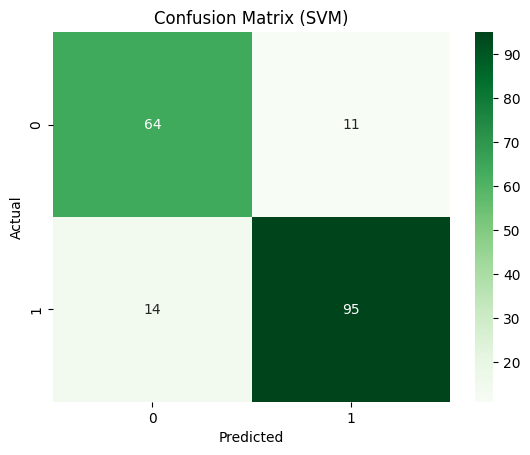

In [118]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **KNN Classifer Model**

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [121]:
y_pred_knn = knn_model.predict(X_test_scaled)

In [122]:
print("## K-Nearest Neighbors Results ##")
print("\nKNN Accuracy (k=5):", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

## K-Nearest Neighbors Results ##

KNN Accuracy (k=5): 0.842391304347826

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        75
           1       0.88      0.84      0.86       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



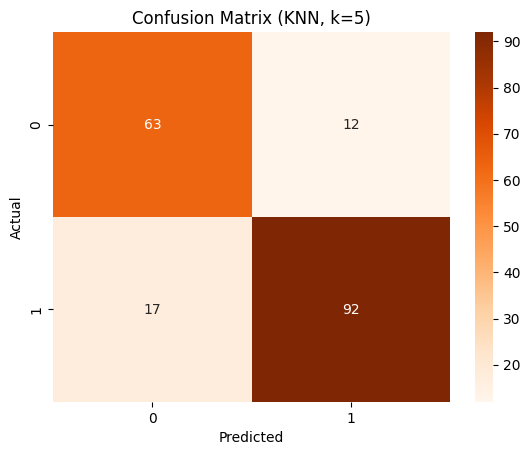

In [123]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix (KNN, k=5)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Day 4 : Random Forest and Feature Importance**

In [124]:
from sklearn.metrics import  confusion_matrix

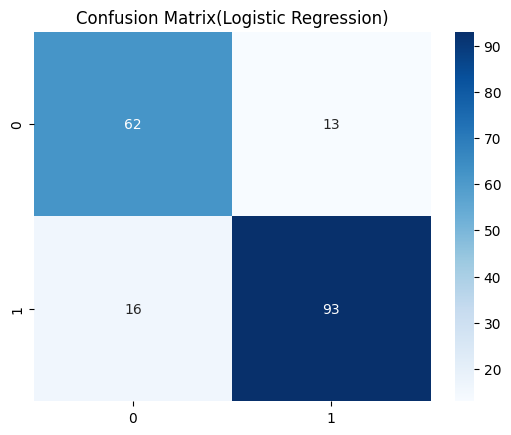

In [125]:
cm = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix(Logistic Regression)')
plt.show()

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [128]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8858695652173914


# **Feature Importance**

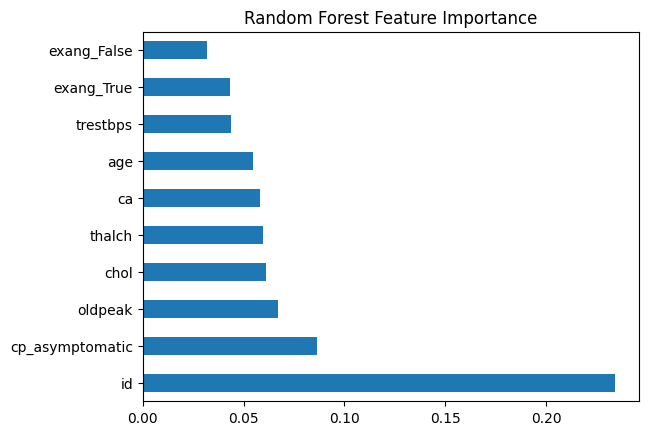

In [129]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()


# **Hyperparameter Tuning Using Bayesian Optimization**(**Random forest classifier**)

In [130]:
!pip install bayesian-optimization

In [131]:
from bayes_opt import BayesianOptimization

In [132]:
def rf_cv(n_estimators, max_depth, min_samples_split):
    model = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        random_state=42
    )
    # Fit on the SCALED validation training data
    model.fit(X_tr_scaled, y_tr)
    preds = model.predict(X_val_scaled)
    return accuracy_score(y_val, preds)

In [133]:
param_bounds = {
    'n_estimators': (50, 200),
    'max_depth': (3, 15),
    'min_samples_split': (2, 10)
}

In [134]:
optimizer = BayesianOptimization(f=rf_cv, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | n_esti... | max_depth | min_sa... |
-------------------------------------------------------------
| 1         | 0.8716216 | 106.18101 | 14.408571 | 7.8559515 |
| 2         | 0.8581081 | 139.79877 | 4.8722236 | 3.2479561 |
| 3         | 0.8783783 | 58.712541 | 13.394113 | 6.8089200 |
| 4         | 0.8581081 | 156.21088 | 3.2470139 | 9.7592788 |
| 5         | 0.8716216 | 174.86639 | 5.5480693 | 3.4545997 |
| 6         | 0.8783783 | 60.313085 | 12.395860 | 7.3832188 |
| 7         | 0.8648648 | 200.0     | 15.0      | 2.0       |
| 8         | 0.8581081 | 80.451949 | 15.0      | 2.0       |
| 9         | 0.8716216 | 52.939586 | 3.2143641 | 10.0      |
| 10        | 0.8716216 | 60.971790 | 4.9596824 | 2.0       |
| 11        | 0.8648648 | 112.90058 | 3.0       | 2.0       |
| 12        | 0.8716216 | 50.0      | 15.0      | 10.0      |
| 13        | 0.8513513 | 187.20305 | 3.0       | 10.0      |
| 14        | 0.8581081 | 169.82219 | 15.0      | 2.0       |
| 15    

In [135]:
best_params = optimizer.max['params']

In [136]:
final_model = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    random_state=42
)

In [137]:
final_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=13, min_samples_split=6, n_estimators=58,
                       random_state=42)

In [138]:
y_pred_final = final_model.predict(X_test_scaled)

In [139]:
print("--- Final Tuned Model Performance ---")
print("Overall Accuracy Score:", accuracy_score(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

--- Final Tuned Model Performance ---
Overall Accuracy Score: 0.8858695652173914

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        75
           1       0.91      0.90      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



# **Hyperparameter Tunning Using Bayesian Optimization** (**SVM**)

In [140]:
def svm_cv(C, gamma):
    """Cross-validation function for SVM"""
    model = SVC(C=C, gamma=gamma, random_state=42)
    model.fit(X_tr_scaled, y_tr)
    preds = model.predict(X_val_scaled)
    return accuracy_score(y_val, preds)

In [141]:
param_bounds = {
    'C': (0.1, 100),
    'gamma': (0.001, 1)
}

In [142]:
optimizer_svm = BayesianOptimization(
    f=svm_cv,
    pbounds=param_bounds,
    random_state=42,
    verbose=2 # verbose = 2 prints each step
)

In [143]:
print("## Running Bayesian Optimization for SVM ##\n")
optimizer_svm.maximize(
    init_points=5, # Number of random exploration steps
    n_iter=15      # Number of bayesian optimization steps
)

## Running Bayesian Optimization for SVM ##

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.6756756 | 37.516557 | 0.9507635 |
| 2         | 0.6824324 | 73.226194 | 0.5990598 |
| 3         | 0.8108108 | 15.686262 | 0.1568385 |
| 4         | 0.6824324 | 5.9025528 | 0.8663099 |
| 5         | 0.6824324 | 60.151389 | 0.7083645 |
| 6         | 0.8108108 | 18.422110 | 0.0150655 |
| 7         | 0.7972972 | 100.0     | 0.0217510 |
| 8         | 0.6621621 | 91.552492 | 1.0       |
| 9         | 0.6621621 | 24.224229 | 1.0       |
| 10        | 0.6621621 | 12.473986 | 1.0       |
| 11        | 0.6621621 | 17.105855 | 1.0       |
| 12        | 0.7905405 | 15.746299 | 0.1842819 |
| 13        | 0.75      | 15.429395 | 0.2408058 |
| 14        | 0.75      | 40.081563 | 0.2042449 |
| 15        | 0.8108108 | 18.652211 | 0.0148562 |
| 16        | 0.6824324 | 37.321381 | 0.7215724 |
| 17        | 0.8108108 | 20.592308 | 0.0961735 |
| 18 

In [144]:
print("\nBest SVM Parameters Found:")
print(optimizer_svm.max)


Best SVM Parameters Found:
{'target': np.float64(0.8108108108108109), 'params': {'C': np.float64(15.686262180199408), 'gamma': np.float64(0.15683852581586644)}}


In [145]:
best_params_svm = optimizer_svm.max['params']


In [146]:
tuned_svm_model = SVC(
    C=best_params_svm['C'],
    gamma=best_params_svm['gamma'],
    random_state=42
)


In [147]:
tuned_svm_model.fit(X_train_scaled, y_train)

SVC(C=np.float64(15.686262180199408), gamma=np.float64(0.15683852581586644),
    random_state=42)

In [148]:
y_pred_svm_tuned = tuned_svm_model.predict(X_test_scaled)

In [149]:
print("\nAccuracy of Tuned SVM:", accuracy_score(y_test, y_pred_svm_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_tuned))


Accuracy of Tuned SVM: 0.8369565217391305

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        75
           1       0.84      0.90      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.82      0.83       184
weighted avg       0.84      0.84      0.84       184



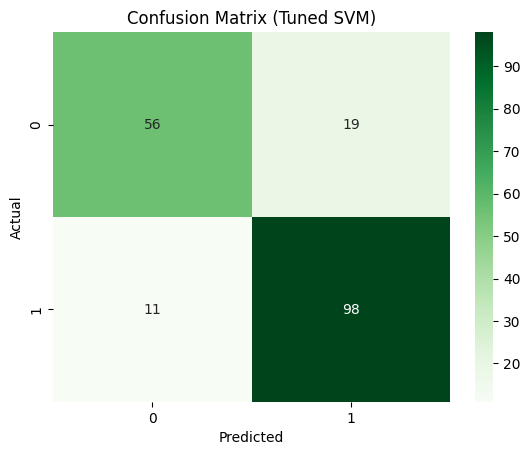

In [150]:
cm_svm_tuned = confusion_matrix(y_test, y_pred_svm_tuned)
sns.heatmap(cm_svm_tuned, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Tuned SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Hyperparameter Tunning Using  K-Fold Cross-Validation** (**Random Forest Classifier**)

In [151]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [152]:
def rf_cv_kfold(n_estimators, max_depth, min_samples_split):
    model = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        random_state=42,
        n_jobs=-1  # Use all available CPU cores to speed up
    )

    # Perform 5-fold cross-validation on the entire training set
    # cross_val_score returns an array of scores, one for each fold
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

    # The function for the optimizer must return a single value, so we return the mean
    return np.mean(scores)

In [153]:
param_bounds = {
    'n_estimators': (50, 200),
    'max_depth': (3, 15),
    'min_samples_split': (2, 10)
}

optimizer_kfold = BayesianOptimization(
    f=rf_cv_kfold,
    pbounds=param_bounds,
    random_state=42
)

print("## Running Bayesian Optimization with 5-Fold Cross-Validation ##\n")
optimizer_kfold.maximize(init_points=5, n_iter=15)

## Running Bayesian Optimization with 5-Fold Cross-Validation ##

|   iter    |  target   | n_esti... | max_depth | min_sa... |
-------------------------------------------------------------
| 1         | 0.8763651 | 106.18101 | 14.408571 | 7.8559515 |
| 2         | 0.8681926 | 139.79877 | 4.8722236 | 3.2479561 |
| 3         | 0.8709137 | 58.712541 | 13.394113 | 6.8089200 |
| 4         | 0.8613899 | 156.21088 | 3.2470139 | 9.7592788 |
| 5         | 0.8804375 | 174.86639 | 5.5480693 | 3.4545997 |
| 6         | 0.8790770 | 173.50386 | 6.1885187 | 2.2203887 |
| 7         | 0.8790862 | 186.61407 | 7.8489837 | 2.4369269 |
| 8         | 0.8790862 | 179.58986 | 15.0      | 10.0      |
| 9         | 0.8682018 | 88.875116 | 3.0       | 2.0       |
| 10        | 0.8600294 | 183.92602 | 3.0       | 10.0      |
| 11        | 0.8750045 | 178.53545 | 10.567529 | 3.6012456 |
| 12        | 0.8750045 | 172.70642 | 8.1528509 | 7.5177529 |
| 13        | 0.8790862 | 186.10470 | 13.843501 | 4.5352541 |
| 14

In [154]:
print("\n" + "="*60)
print("--- Training and Evaluating Final Model ---")

# Get the best parameters found by the robust k-fold optimization
best_params_kfold = optimizer_kfold.max['params']
print("\nBest Parameters Found:", best_params_kfold)


--- Training and Evaluating Final Model ---

Best Parameters Found: {'n_estimators': np.float64(191.9263292227709), 'max_depth': np.float64(11.539792301276206), 'min_samples_split': np.float64(2.0)}


In [155]:
final_model_kfold = RandomForestClassifier(
    n_estimators=int(best_params_kfold['n_estimators']),
    max_depth=int(best_params_kfold['max_depth']),
    min_samples_split=int(best_params_kfold['min_samples_split']),
    random_state=42
)

In [156]:
final_model_kfold.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=11, n_estimators=191, random_state=42)

In [157]:
y_pred_final_kfold = final_model_kfold.predict(X_test_scaled)

In [158]:
print("\n--- Final Tuned Model Performance (with K-Fold CV) ---")
print("\nOverall Accuracy Score:", accuracy_score(y_test, y_pred_final_kfold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final_kfold))


--- Final Tuned Model Performance (with K-Fold CV) ---

Overall Accuracy Score: 0.8913043478260869

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        75
           1       0.92      0.90      0.91       109

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



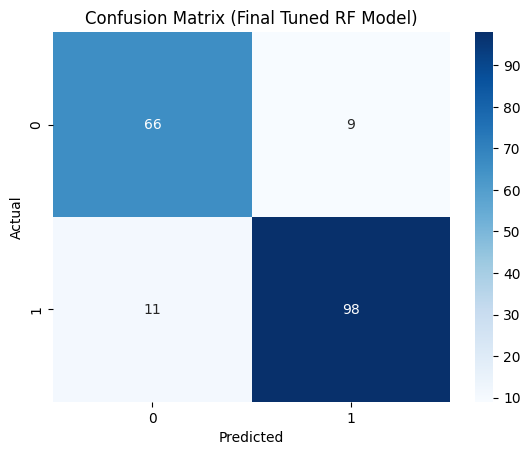

In [159]:
cm_final = confusion_matrix(y_test, y_pred_final_kfold)
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Final Tuned RF Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Hyperparameter Tunning Using  XGBoost and K fold cross validation** (**Random Forest Classifier**)

In [160]:
!pip install xgboost

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [162]:
def xgb_cv_kfold(n_estimators, max_depth, learning_rate, gamma):
    model = XGBClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        learning_rate=learning_rate,
        gamma=gamma,
        random_state=42,
        eval_metric='logloss' # No use_label_encoder needed
    )
    # ... rest of the function
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    return np.mean(scores)

In [163]:
param_bounds_xgb = {
    'n_estimators': (50, 300),
    'max_depth': (2, 8),
    'learning_rate': (0.01, 0.3),
    'gamma': (0, 1)
}

optimizer_xgb = BayesianOptimization(
    f=xgb_cv_kfold,
    pbounds=param_bounds_xgb,
    random_state=42
)

print("## Running Bayesian Optimization for XGBoost with 5-Fold Cross-Validation ##\n")
optimizer_xgb.maximize(init_points=5, n_iter=15)

## Running Bayesian Optimization for XGBoost with 5-Fold Cross-Validation ##

|   iter    |  target   | n_esti... | max_depth | learni... |   gamma   |
-------------------------------------------------------------------------
| 1         | 0.8722743 | 143.63502 | 7.7042858 | 0.2222782 | 0.5986584 |
| 2         | 0.8736256 | 89.004660 | 2.9359671 | 0.0268442 | 0.8661761 |
| 3         | 0.8722743 | 200.27875 | 6.2484354 | 0.0159695 | 0.9699098 |
| 4         | 0.8546056 | 258.11066 | 3.2740346 | 0.0627292 | 0.1834045 |
| 5         | 0.8668413 | 126.06056 | 5.1485385 | 0.1352640 | 0.2912291 |
| 6         | 0.8709137 | 87.666324 | 2.4898343 | 0.1251689 | 0.5089557 |
| 7         | 0.8681926 | 94.690564 | 4.5713440 | 0.01      | 1.0       |
| 8         | 0.8858429 | 88.843875 | 7.7577225 | 0.01      | 1.0       |
| 9         | 0.8817705 | 85.748110 | 8.0       | 0.01      | 1.0       |
| 10        | 0.8844916 | 76.872131 | 8.0       | 0.01      | 1.0       |
| 11        | 0.8627688 | 71.71928

In [164]:
print("\n" + "="*60)
print("--- Training and Evaluating Final XGBoost Model ---")

best_params_xgb = optimizer_xgb.max['params']
print("\nBest Parameters Found:", best_params_xgb)


--- Training and Evaluating Final XGBoost Model ---

Best Parameters Found: {'n_estimators': np.float64(88.84387537380512), 'max_depth': np.float64(7.757722565199512), 'learning_rate': np.float64(0.01), 'gamma': np.float64(1.0)}


In [165]:
final_model_xgb = XGBClassifier(
    n_estimators=int(best_params_xgb['n_estimators']),
    max_depth=int(best_params_xgb['max_depth']),
    learning_rate=best_params_xgb['learning_rate'],
    gamma=best_params_xgb['gamma'],
    random_state=42,
    eval_metric='logloss' # No use_label_encoder needed
)

final_model_xgb.fit(X_train_scaled, y_train)
y_pred_final_xgb = final_model_xgb.predict(X_test_scaled)

print("\n--- Final Tuned XGBoost Model Performance ---")
print("\nOverall Accuracy Score:", accuracy_score(y_test, y_pred_final_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final_xgb))


--- Final Tuned XGBoost Model Performance ---

Overall Accuracy Score: 0.8369565217391305

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        75
           1       0.89      0.83      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



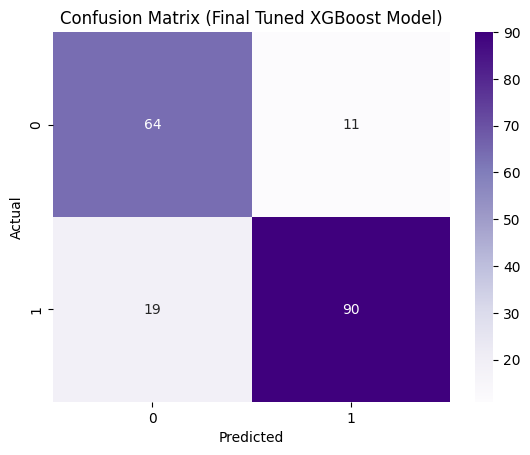

In [166]:
cm_final_xgb = confusion_matrix(y_test, y_pred_final_xgb)
sns.heatmap(cm_final_xgb, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix (Final Tuned XGBoost Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **SHAP (SHapley Additive exPlanations)**

In [167]:
!pip install shap

In [169]:
import shap

# --- Create the SHAP Explainer ---
# For tree-based models like XGBoost, TreeExplainer is highly optimized.
# We pass it the final, tuned XGBoost model.
explainer = shap.TreeExplainer(final_model_xgb)

# --- Calculate SHAP Values for the Test Set ---
# This computes the contribution of each feature for each prediction in the test set.
shap_values = explainer.shap_values(X_test_scaled)

# --- Visualize the Explanations ---

# 1. Global Feature Importance (Summary Plot)
# This plot is more informative than the standard feature importance plot.
# It shows not only the importance but also the direction of the effect.
print("\n--- SHAP Summary Plot (Global Feature Importance) ---")
shap.summary_plot(shap_values, X_test, plot_type="bar") # For a simple bar chart
plt.show()

# The beeswarm plot is even more detailed
print("\n--- SHAP Beeswarm Plot (Detailed Summary) ---")
shap.summary_plot(shap_values, X_test)
plt.show()


# 2. Individual Prediction Explanation (Force Plot)
# This explains a single prediction. Let's look at the first patient in the test set.
print("\n--- SHAP Force Plot (Explaining a Single Prediction) ---")

# Initialize JavaScript plots in the notebook
shap.initjs()

# Explain the prediction for the first instance (index 0) in the test set
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

ValueError: could not convert string to float: '[5.4347825E-1]'

# **Save the Model Into Our Environement**

In [170]:
import joblib

# save
joblib.dump(final_model_kfold, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

# load
scaler = joblib.load("scaler.pkl")
model = joblib.load("model.pkl")


In [171]:
sample =X.head(1)
sample.to_csv('Heart_user_template.csv',index = False)
print("User Template  saved as  'Heart_user_template.csv' ")

User Template  saved as  'Heart_user_template.csv' 


# **Day 5 - User Upload & Prediction**

In [172]:
from google.colab import files

uploaded = files.upload()  # User uploads their patient data as CSV (same columns as sample template)

Saving Heart_user_template.csv to Heart_user_template (2).csv


In [174]:
import joblib
import pandas as pd

user_df = pd.read_csv('Heart_user_template.csv')

# Get column lists from training dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

# Drop columns not in user_df to avoid errors
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

# Fill missing values in numeric columns with training set mean
user_df[numeric_cols] = user_df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in categorical columns with 'Unknown'
for col in cat_cols:
    user_df[col] = user_df[col].fillna('Unknown')

# Convert boolean columns to int
for col in bool_cols:
    user_df[col] = user_df[col].astype(int)

# One-hot encode categorical columns
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)

# Align columns with training features X.columns
user_df_encoded = user_df_encoded.reindex(columns=X.columns, fill_value=0)

# Scale data
scaler = joblib.load('scaler.pkl')
user_scaled = scaler.transform(user_df_encoded)

# Predict
model = joblib.load('model.pkl')
preds = model.predict(user_scaled)
user_df['Heart_Disease_Prediction'] = preds

print(user_df)

   id  age  trestbps   chol  thalch  oldpeak   ca  sex_Female  sex_Male  \
0   1   63     145.0  233.0   150.0      2.3  0.0       False      True   

   dataset_Cleveland  ...  restecg_st-t abnormality  exang_False  exang_True  \
0               True  ...                     False         True       False   

   slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
0               True       False            False               True   

   thal_normal  thal_reversable defect  Heart_Disease_Prediction  
0        False                   False                         0  

[1 rows x 31 columns]


# **Multi-Layer Perceptron (MLP)**